<a href="https://colab.research.google.com/github/Tejal-24/ML_Wine-Quality-Prediction/blob/main/WineQUALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd#data manipulation
pd.set_option('display.max_columns', None)
import numpy as np # mathematical operations
import seaborn as sns # visualizations
import matplotlib.pyplot as plt # for plottings
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datascience/winequalityN.csv')
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
for col in dataset.columns:
    if dataset[col].isnull().any():
        dataset[col]=dataset[col].fillna(dataset[col].mean())

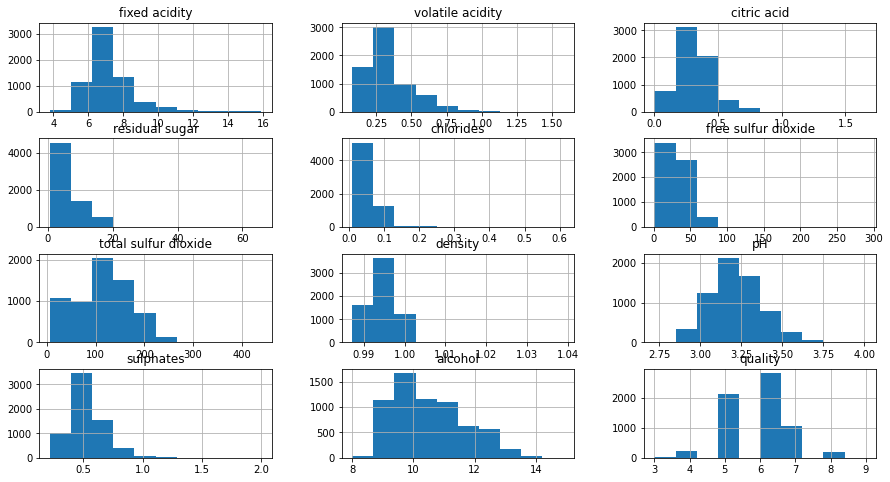

In [ ]:
dataset.hist(bins=10,figsize=(15,8))
plt.show()

In [ ]:
def quality_label(x):
    if x < 6:
        x = 0
    elif x ==6:
        x = 1
    else:
        x =2 
    
    return(x)
dataset['quality_label'] = dataset['quality'].apply(lambda x: quality_label(x))


In [ ]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


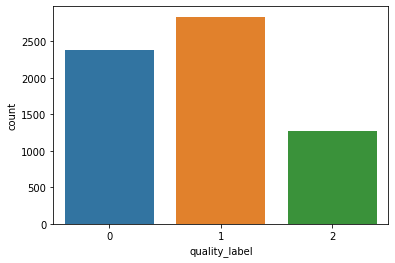

In [ ]:
sns.countplot(dataset['quality_label'])

In [ ]:
dataset['type']=pd.get_dummies(dataset['type'], drop_first=True)

In [ ]:
dataset = dataset.drop(['quality'], axis=1)

In [ ]:
def correlation(dataset, threshold):
  col_corr  = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr


In [ ]:
corr_features = correlation(dataset, 0.8)
print(corr_features)

set()


In [ ]:
X=dataset.drop('quality_label',axis=1)
y=dataset['quality_label']

In [ ]:
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


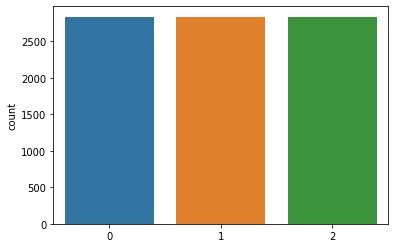

In [ ]:
sns.countplot(y_over)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.3, random_state=40)

In [ ]:
scaler=MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

In [ ]:
DT = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth = 10)



DT.fit(Xtrain_scaled,y_train)
y_predDT= DT.predict(Xtest_scaled)
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       840
           1       0.73      0.80      0.76       861
           2       0.54      0.44      0.48       852

    accuracy                           0.65      2553
   macro avg       0.64      0.65      0.64      2553
weighted avg       0.64      0.65      0.65      2553



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RF = RandomForestClassifier()
paramgrid = { 'n_estimators': [50,80,100,120,140,150,180,200],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,8,10]}
random = RandomizedSearchCV(RF, paramgrid, random_state=0 )
RF_clf = random.fit(Xtrain_scaled,y_train)

In [ ]:
print(RF_clf.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
RF = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150)



RF.fit(Xtrain_scaled,y_train)
y_predRF= RF.predict(Xtest_scaled)
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       840
           1       0.77      0.91      0.83       861
           2       0.72      0.49      0.58       852

    accuracy                           0.74      2553
   macro avg       0.74      0.74      0.73      2553
weighted avg       0.74      0.74      0.73      2553



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
XGB = XGBClassifier()
paramgrid = { 'n_estimators': [50,80,100,120,140,150,180,200],
    'max_depth':[3,5,8,10]}
random = RandomizedSearchCV(XGB, paramgrid, random_state=0 )
XGB_clf = random.fit(Xtrain_scaled,y_train)

In [ ]:
XGB_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)



XGB.fit(Xtrain_scaled,y_train)
y_predXGB= XGB.predict(Xtest_scaled)
print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       840
           1       0.86      0.92      0.89       861
           2       0.75      0.66      0.70       852

    accuracy                           0.80      2553
   macro avg       0.80      0.80      0.80      2553
weighted avg       0.80      0.80      0.80      2553

